In [1]:
%matplotlib inline
import pymongo
from pymongo import MongoClient
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
import matplotlib.pyplot as plt
import numpy
from pprint import pprint
from collections import defaultdict
from datetime import datetime, timedelta
from functools import partial
import time
db = MongoClient('localhost').condor

In [2]:
def timekey(t):
    return datetime.fromtimestamp(t).strftime('%Y-%m-%d')
def make2list():
    return [0.,0.]                                              

In [93]:
projection = ['MATCH_EXP_JOBGLIDEIN_ResourceName','EnteredCurrentStatus','ResidentSetSize_RAW',]
filter = {#'EnteredCurrentStatus':{'$gte':time.mktime((2017,1,7,0,0,0,0,0,0)),
          #                        '$lt':time.mktime((2017,2,14,0,0,0,0,0,0))},
         # 'JobStatus':4,# 'ExitCode':0,
         # 'Owner':'i3filter',
          'Requestgpus':1,
          'ResidentSetSize_RAW':{'$gt':1000}
         }
# by day
memory = defaultdict(list)
start_time = time.time()
for i,row in enumerate(db.condor_history.find(filter=filter,projection=projection)):
    try:
        if 'MATCH_EXP_JOBGLIDEIN_ResourceName' not in row or 'ResidentSetSize_RAW' not in row:
            continue
        site = row['MATCH_EXP_JOBGLIDEIN_ResourceName']
        date = timekey(row['EnteredCurrentStatus'])
        memory[date].append(float(row['ResidentSetSize_RAW']))
    except:
        print(row)
        raise
print(time.time()-start_time)

319.72594571113586


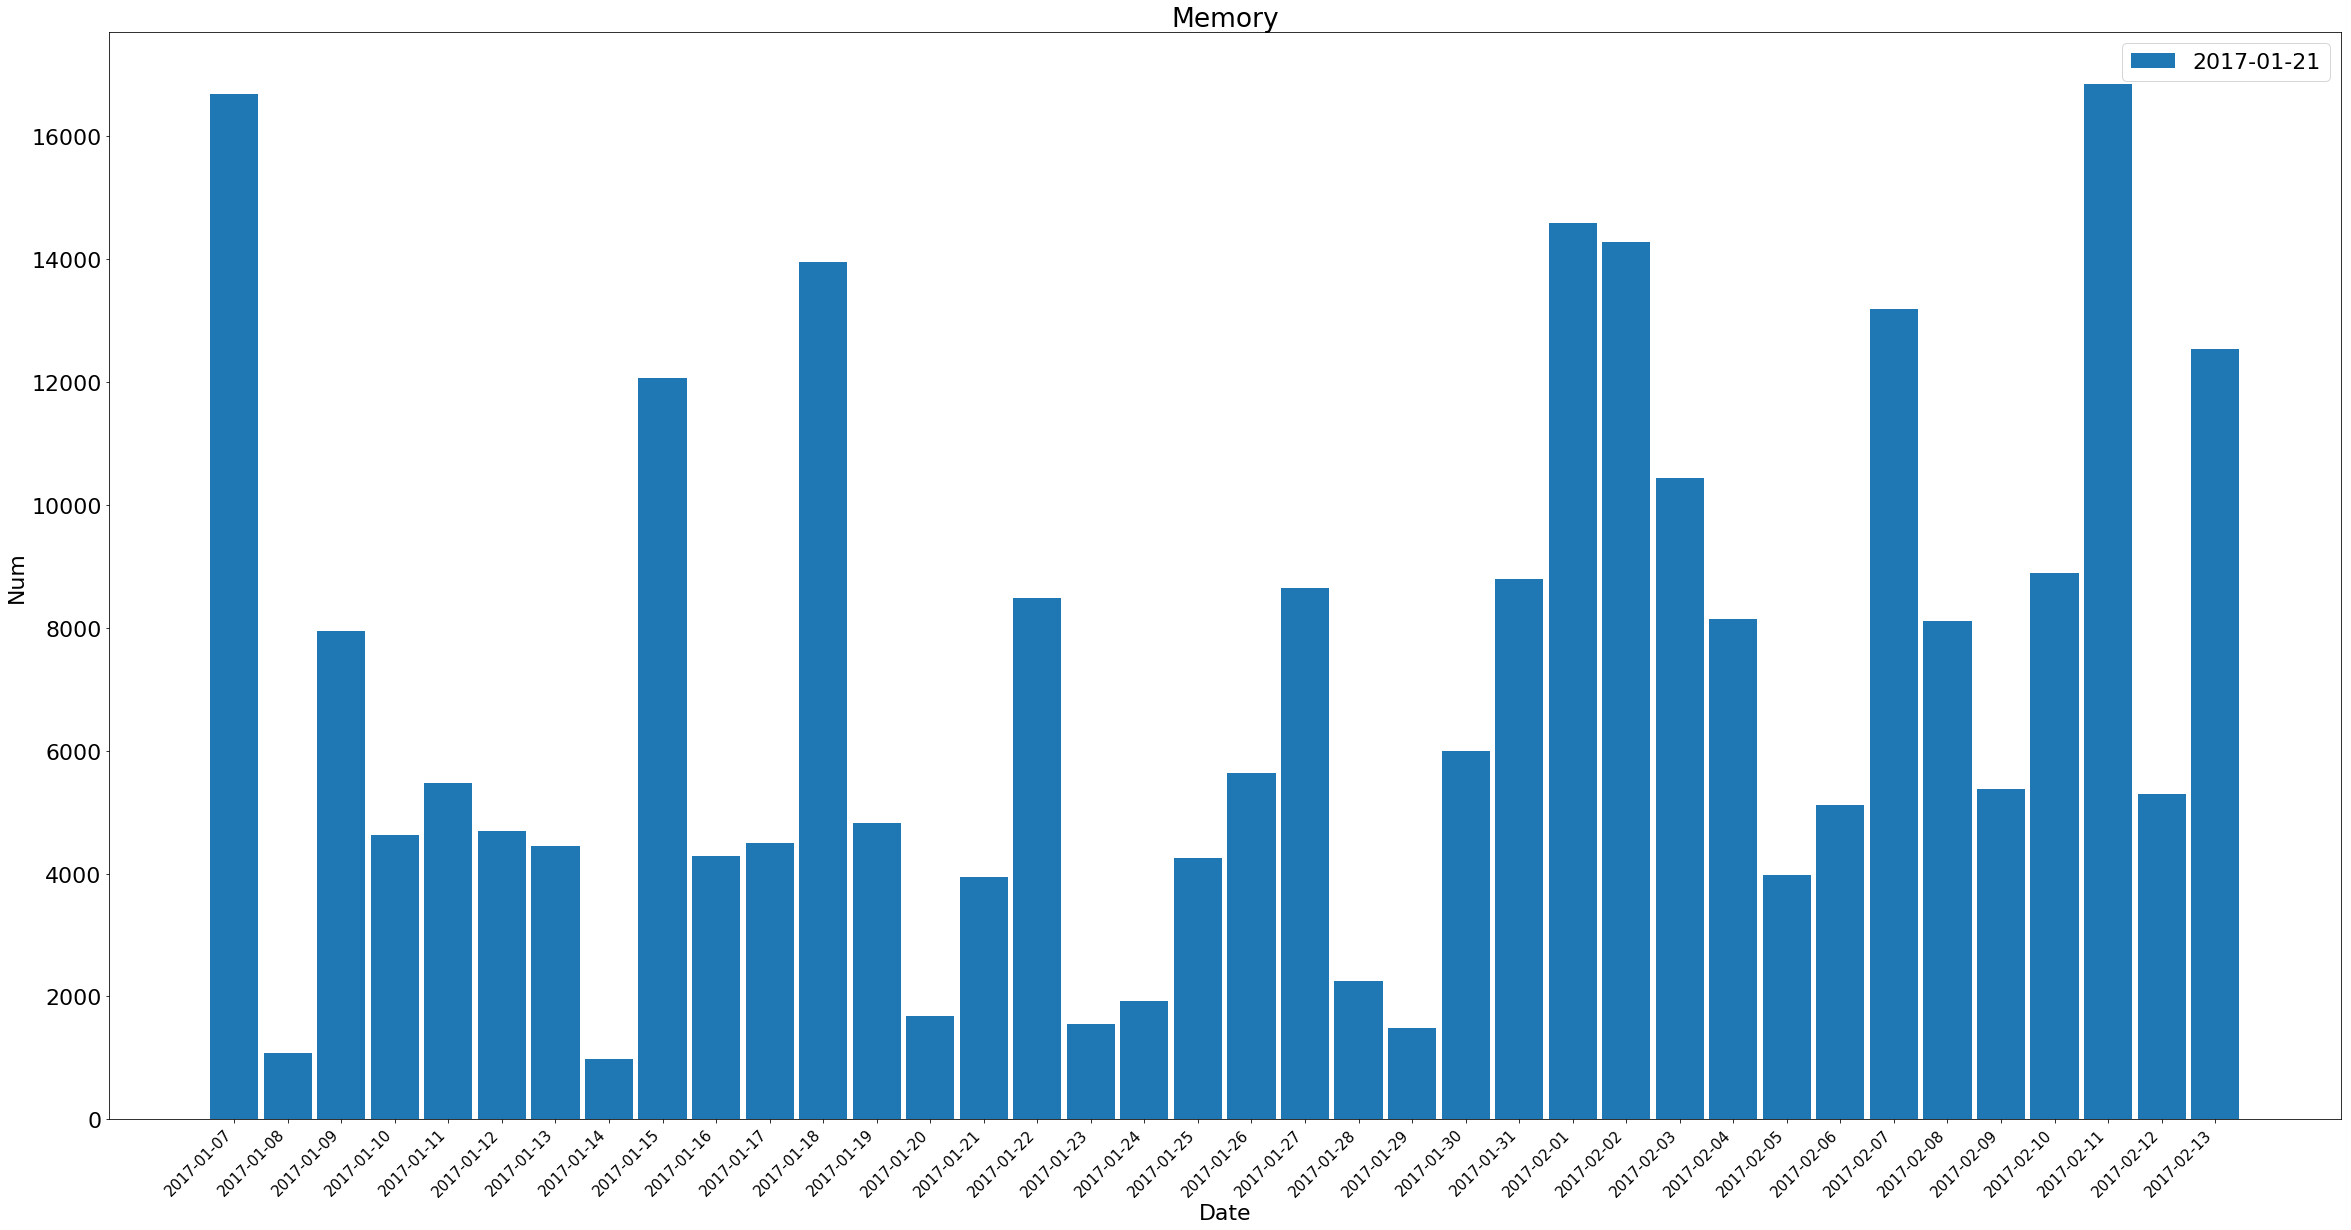

In [68]:
x = sorted(set(x for x in memory.keys()))
xx = numpy.arange(len(x))
y = [len(memory[d]) for d in memory]

legend = category.keys()
width = .9#/len(legend)
plots = []
fig, ax = plt.subplots(figsize=(40, 20))
ax.set_xticks(xx[::14])
ax.set_xticklabels(x[::14])
ax.set_xlabel('Date')
ax.set_ylabel('Num')
ax.set_title('Memory')
plots.append(ax.bar(xx, y, width))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=15, horizontalalignment='right')
plt.legend(plots, legend)

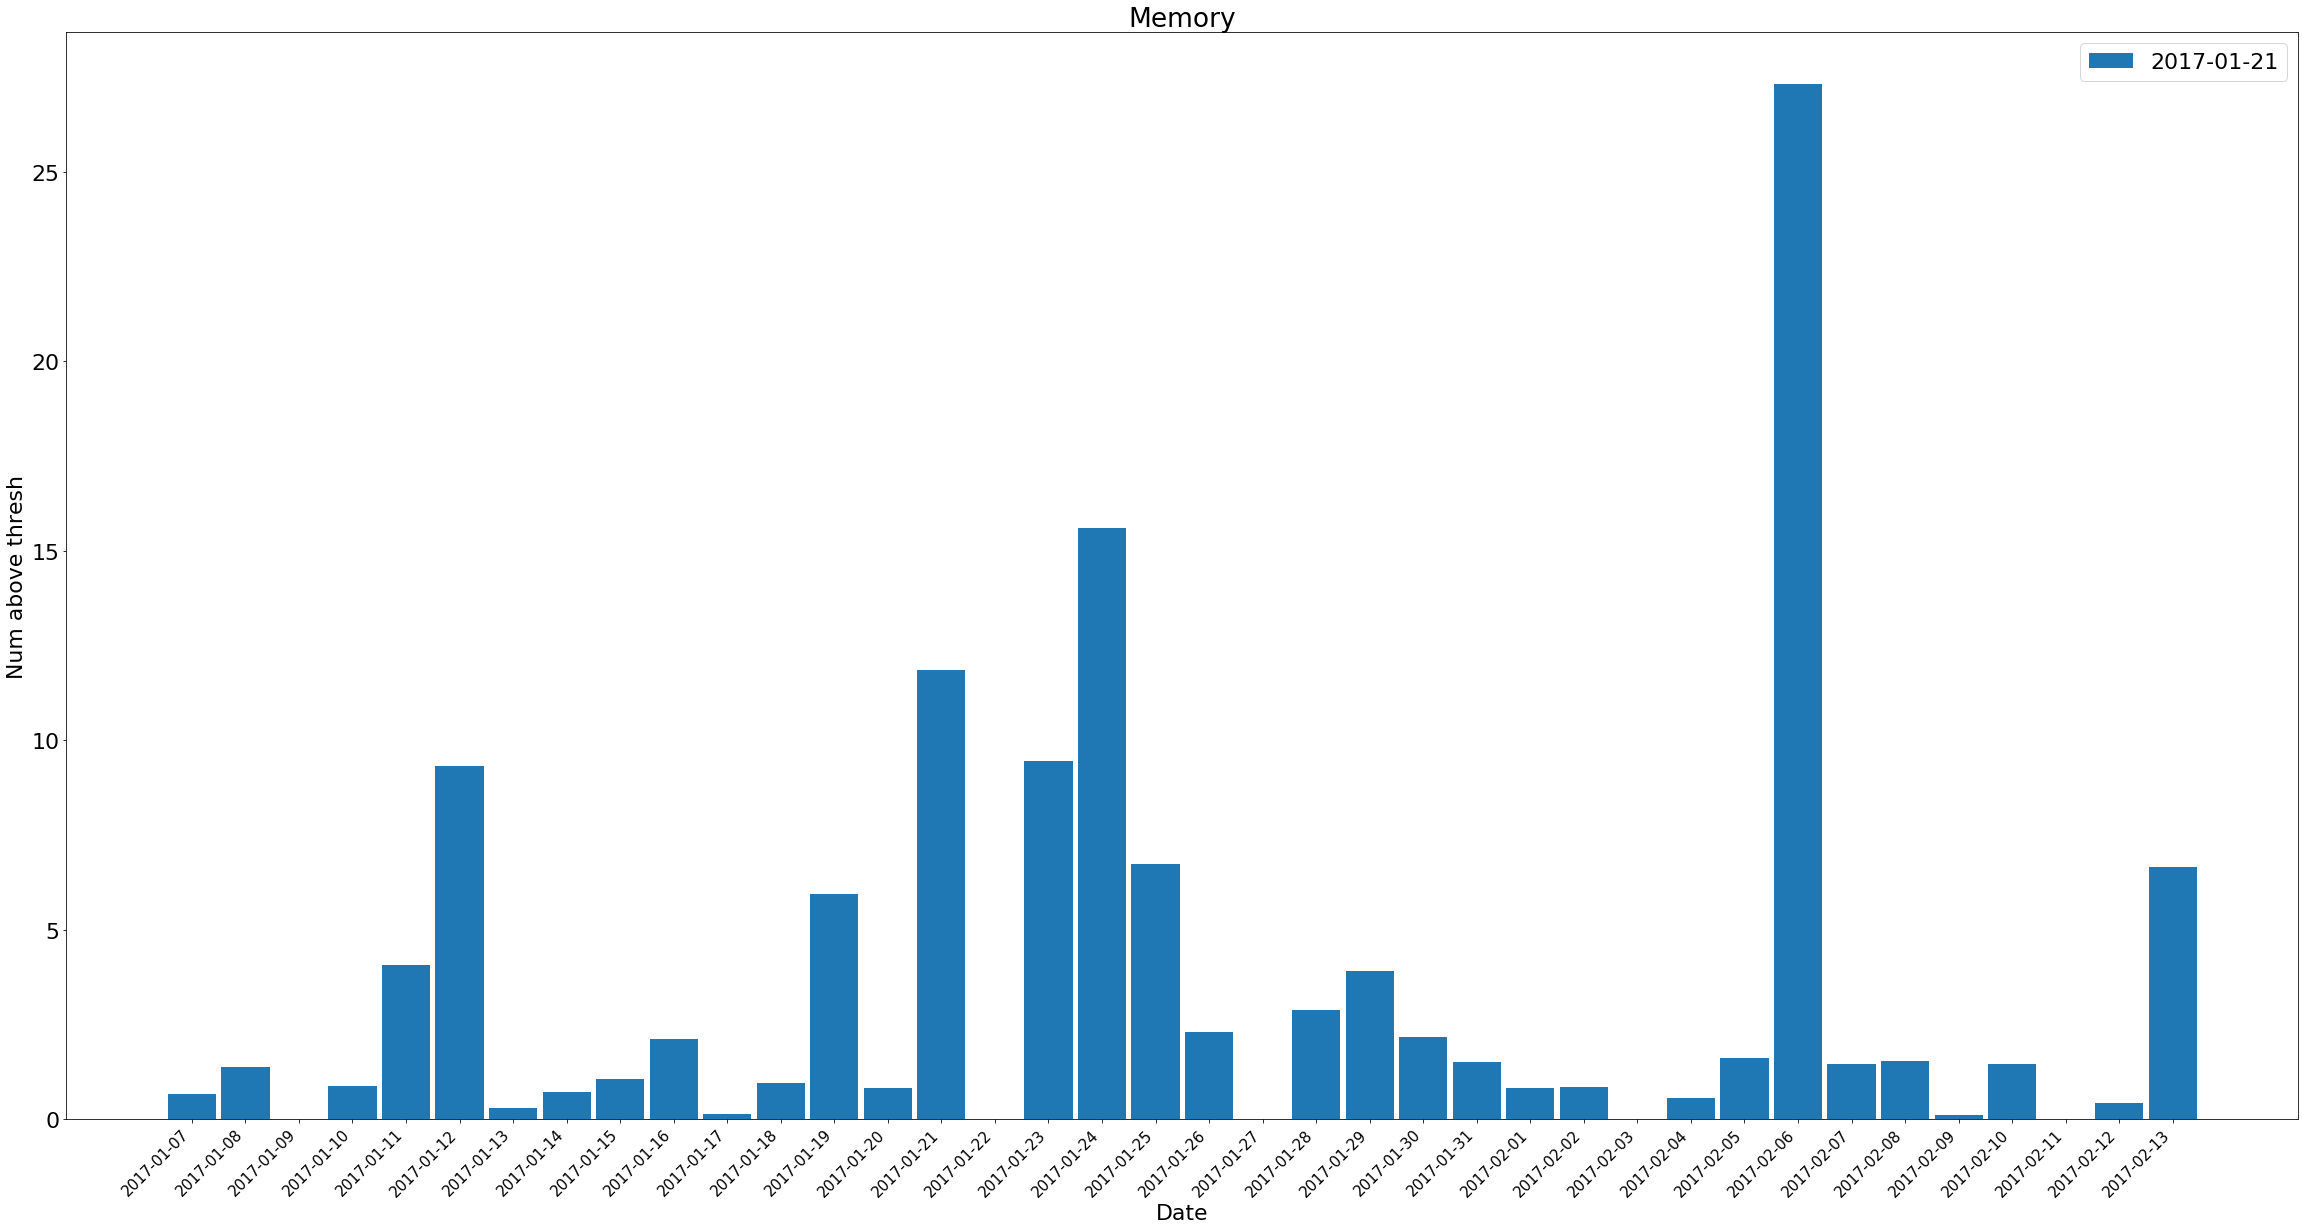

In [69]:
category = memory
x = sorted(set(x for x in category.keys()))
xx = numpy.arange(len(x))
#y = [sum(category[k][d][0] for k in category)/sum(category[k][d][1] for k in category)/1024/1024 for d in x]
y2 = [max(category[d])/1024/1024 for d in x]
thresh = 3.3*1024*1024
y3 = [sum(1 for x in category[d] if x > thresh)/len(category[d])*100 for d in category]

legend = category.keys()
width = .9#/len(legend)
plots = []
fig, ax = plt.subplots(figsize=(40, 20))
ax.set_xticks(xx)
ax.set_xticklabels(x)
ax.set_xlabel('Date')
ax.set_ylabel('Num above thresh')
ax.set_title('Memory')
plots.append(ax.bar(xx, y3, width))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=15, horizontalalignment='right')
plt.legend(plots, legend)

(-0.6, 58.6)

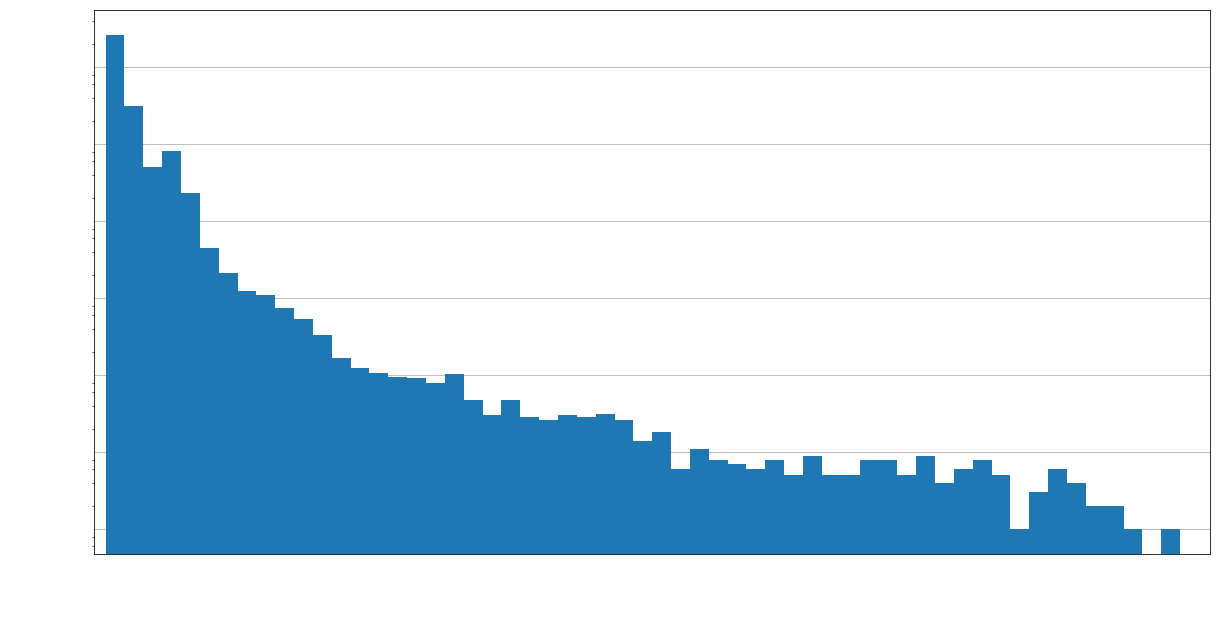

In [101]:
flatlist = []
for d in memory:
    flatlist.extend(memory[d])
data = numpy.array(flatlist)/1024/1024
max_data = 58

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xticks(numpy.arange(0,max_data+1,5))
ax.get_xaxis().set_tick_params(colors='white')
ax.get_yaxis().set_tick_params(colors='white')
ax.set_xlabel('GB of Memory', labelpad=10, color='white', fontsize=32)
ax.set_ylabel('Number of Jobs', labelpad=10, color='white', fontsize=32)
ax.get_yaxis().grid(b=True, which='major')
ax.set_axisbelow(True)
ax.hist(data, bins=range(max_data), log=True)
plt.xlim([-.6,max_data+.6])

In [103]:
len(data[data>3.5])/len(data)

0.02333032384867886